## Import necessary libraries and data

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [622]:
# import csv of data
health_df = pd.read_csv("mental_health_tech.csv")

## Preview the dataframe

In [623]:
health_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [624]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Pre-processing the data

We can drop Timestamp because it is irrelevant to our questions. 

In [625]:
health_df = health_df.drop("Timestamp",axis = 1)

We can see that there are some null values in our data. Let's find out how many and what columns they exist in.

In [626]:
# check columns for missing values 
null_count = health_df.isna().sum().sort_values(ascending=False)
null_percent = null_count/len(health_df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print(null_summary)

                           Count  Percentage
comments                    1095   86.973789
state                        515   40.905481
work_interfere               264   20.969023
self_employed                 18    1.429706
anonymity                      0    0.000000
obs_consequence                0    0.000000
mental_vs_physical             0    0.000000
phys_health_interview          0    0.000000
mental_health_interview        0    0.000000
supervisor                     0    0.000000
coworkers                      0    0.000000
phys_health_consequence        0    0.000000
mental_health_consequence      0    0.000000
leave                          0    0.000000
Age                            0    0.000000
seek_help                      0    0.000000
Gender                         0    0.000000
care_options                   0    0.000000
benefits                       0    0.000000
tech_company                   0    0.000000
remote_work                    0    0.000000
no_employe

The null values are specifically in comments, state, work_interfere, and self_employed. 

For "comments," almost 87% of data was missing which is understandable since extra comments are usually optional for survey responders. 

We can drop comments because it will not add any additional information for us. 

In [627]:
# drop comments column
health_df = health_df.drop("comments",axis = 1)

The next column missing many values is "state."

In [628]:
# explore state column
health_df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

The state column can be attributed to the country column. Let's explore country. 

In [629]:
# explore country column
country_count = health_df.Country.value_counts()
country_percent = country_count/len(health_df.index)*100
country_summary = pd.concat([country_count, country_percent], axis = 1, keys = ["Count", "Percentage"])
print(country_summary)

                        Count  Percentage
United States             751   59.650516
United Kingdom            185   14.694202
Canada                     72    5.718824
Germany                    45    3.574265
Ireland                    27    2.144559
Netherlands                27    2.144559
Australia                  21    1.667990
France                     13    1.032566
India                      10    0.794281
New Zealand                 8    0.635425
Poland                      7    0.555997
Switzerland                 7    0.555997
Sweden                      7    0.555997
Italy                       7    0.555997
South Africa                6    0.476569
Belgium                     6    0.476569
Brazil                      6    0.476569
Israel                      5    0.397141
Singapore                   4    0.317712
Bulgaria                    4    0.317712
Austria                     3    0.238284
Finland                     3    0.238284
Mexico                      3    0

We can see that:

1. The majority of data comes from the United States (60%) so data points from many other countries only accounts for a small portion of the overall data. 
2. The state information is only relevant to the United States. 

Since the state and country data is missing values and has biased distribution, we will drop them because we do not need them.

In [630]:
health_df = health_df.drop(["Country", "state"],axis = 1)

For work_interfere, we can begin by checking the count of the values for the responses

In [631]:
# explore work_interfere column
health_df["work_interfere"].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

Since the missing value is quite high, we can create a "don't know" category for the missing values.  

In [632]:
health_df["work_interfere"] = health_df["work_interfere"].fillna("Don't know")
health_df["work_interfere"].value_counts()

Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

For self_employed, we can also begin by checking the count of the values for each response. 

In [633]:
# explore self_employed column
health_df["self_employed"].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

Since the overwhelming majority of responses is 'No,' we can replace the missing values with it.

In [634]:
health_df["self_employed"].fillna("No", inplace = True)
health_df["self_employed"].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

We will check for any remaining missing values

In [635]:
health_df.isna().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Now that there are no more missing values/nulls, we can look through to catch any outliers. 

In [636]:
# print out all column values
for column in health_df.columns:
    print(column, end = ": ")
    print(health_df[column].unique())

Age: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning an

We can see some discrepancies in the Age and Gender columns. 

We will address Age first. You can see unreasonable values that are either too low or extremely high. It is highly unlikely that any employees would be below the age of 14 (minimum working age) or above the age of 100.

In [637]:
# check the count of values under 14
print(health_df["Age"][health_df["Age"] < 14].count())

# check the count of values over 100
print(health_df["Age"][health_df["Age"] > 100].count())

6
2


There are not that many outliers so we are able to drop them.

In [638]:
# drop values under 14
health_df.drop(health_df[health_df["Age"] < 14].index, inplace = True)

# drop values over 100
health_df.drop(health_df[health_df["Age"] > 100].index, inplace = True)

# print ages
health_df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

We can also see in the Gender column that a plethora of gender terms appeared. 

In [639]:
# print out count of each gender
health_df["Gender"].value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [640]:
health_df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

To organize, we will categorize the terms into 3 groups: Male, Female, and Queer.

In [641]:
male = ['M', 'Male', 'male', 'm', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make',
        'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']
        
female = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ', 
        'cis-female/femme', 'Female (cis)', 'femail']
    
queer = ['Male-ish','Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'Enby', 
         'fluid', 'Genderqueer', 'Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous',
         'Trans woman', 'Neuter', 'Female (trans)', 'queer', 'ostensibly male, unsure what that really means']

total = len(male) + len(female) + len(queer)
assert(total == len(health_df["Gender"].unique()))

health_df["Gender"].replace(male,"Male", inplace = True)
health_df["Gender"].replace(female,"Female", inplace = True)
health_df["Gender"].replace(queer,"Queer", inplace = True)
health_df["Gender"].value_counts()
    

Male      985
Female    247
Queer      19
Name: Gender, dtype: int64

Now let's see if all of our missing values are taken care of.

In [642]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   self_employed              1251 non-null   object
 3   family_history             1251 non-null   object
 4   treatment                  1251 non-null   object
 5   work_interfere             1251 non-null   object
 6   no_employees               1251 non-null   object
 7   remote_work                1251 non-null   object
 8   tech_company               1251 non-null   object
 9   benefits                   1251 non-null   object
 10  care_options               1251 non-null   object
 11  wellness_program           1251 non-null   object
 12  seek_help                  1251 non-null   object
 13  anonymity                  1251 non-null   object
 14  leave   

## Data Understanding/Visualization

Now that we have cleaned our data, we can now use visualizations to start to explore our questions. 

### Profile of Respondents

#### Mental health treatment

Text(0.5, 1.0, 'Has survey respondent sought treatment?')

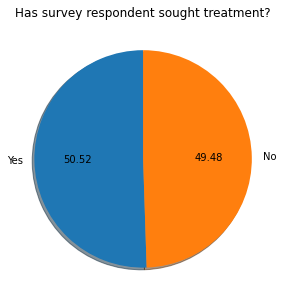

In [663]:
plt.figure(figsize = (10,5))
value = health_df['treatment'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'No'], startangle = 90, shadow = True)
plt.title('Has survey respondent sought treatment?')

#### Age

Text(0.5, 1.0, 'Age distribution by treatment')

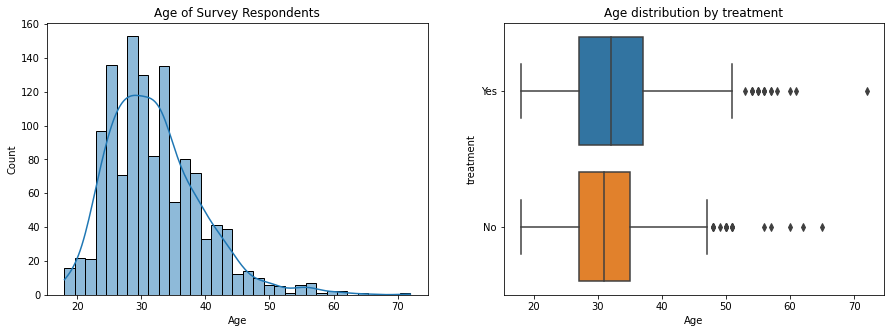

In [644]:
# age
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = health_df['Age'], kde = True)
plt.title('Age of Survey Respondents')

# age and treatment
plt.subplot(1,2,2)
sns.boxplot(x = health_df["Age"], y = health_df["treatment"])
plt.title("Age distribution by treatment")

Most of the employees that filled out the survey are around their end 20s to early 40s. The tech industry tends to have younger employees so the data is right-skewed. 

There are no significant differences in ages that sought treatment vs did not seek treatment. 

#### Gender

Text(0.5, 1.0, 'Gender and Treatment of Survey Respondents')

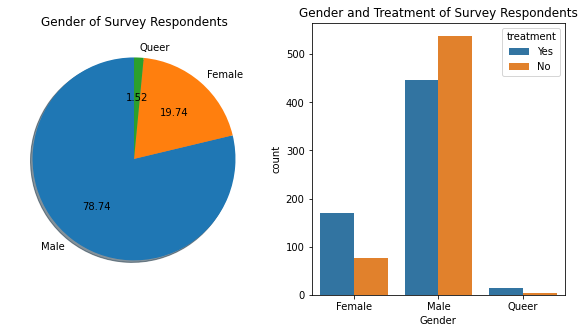

In [645]:
# gender
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['Gender'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Male', 'Female', 'Queer'], startangle = 90, shadow = True)
plt.title('Gender of Survey Respondents')

# gender and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['Gender'], hue = health_df['treatment'])
plt.title('Gender and Treatment of Survey Respondents')

We can see that the tech workplace is heavily male-dominated. 

Female and queer responders are more likely to seek treatment than male responders. 

#### Family History

Text(0.5, 1.0, 'Family history of mental health illness and treatment')

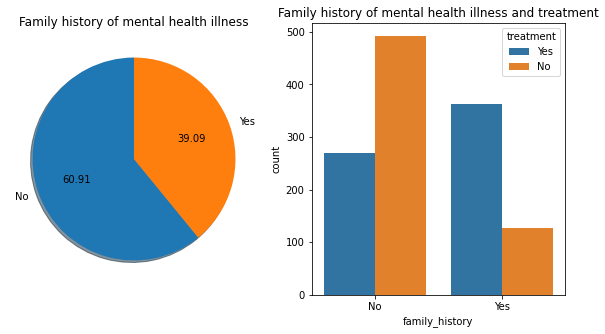

In [646]:
# family history
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['family_history'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', 'Yes'], startangle = 90, shadow = True)
plt.title('Family history of mental health illness')

# family history and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['family_history'], hue = health_df['treatment'])
plt.title('Family history of mental health illness and treatment')

The majority of employees do not have a family history of mental health conditions. However, employees with a family history sought treatment more than not. 

### Work conditions

#### Mental health and work interference

Text(0.5, 1.0, 'Work Interference and treatment')

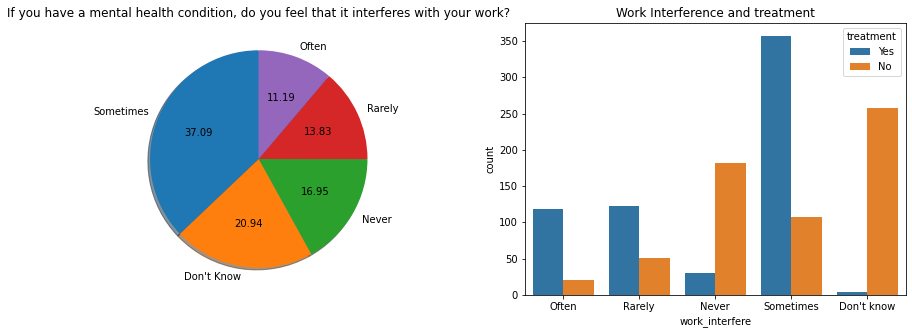

In [647]:
# work interference
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['work_interfere'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Sometimes', "Don't Know", 'Never', 'Rarely', 'Often'], startangle = 90, shadow = True)
plt.title("If you have a mental health condition, do you feel that it interferes with your work?")

# work interference and treament
plt.subplot(1,2,2)
sns.countplot(x = health_df['work_interfere'], hue = health_df['treatment'])
plt.title('Work Interference and treatment')

We can see that many people have experienced some kind of interference from mental health at some point. Those that do experience an interference tend to seek treatment if they think that their work will be affected.

It is interesting to note how a little portion of the group that has never been affected by a mental health condition, still decide to get treatment before it becomes a job stress. 

#### Office or self-employed

Text(0.5, 1.0, 'Self-employment and treatment')

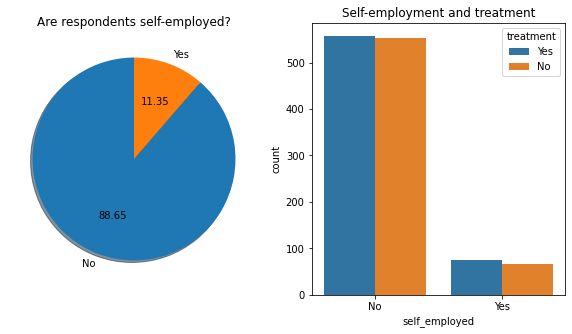

In [648]:
# self-employment
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['self_employed'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', 'Yes'], startangle = 90, shadow = True)
plt.title("Are respondents self-employed?")

# self-employment and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['self_employed'], hue = health_df['treatment'])
plt.title('Self-employment and treatment')

#### In-person or remote

Text(0.5, 1.0, 'Work style and treatment')

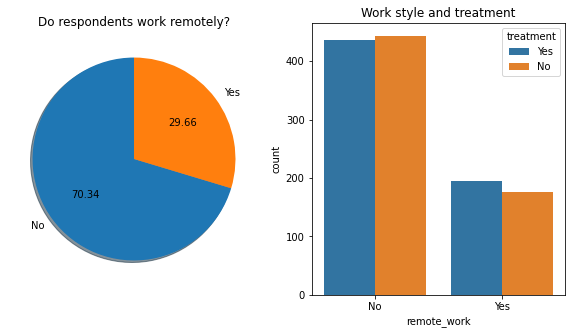

In [649]:
# work style
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['remote_work'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', 'Yes'], startangle = 90, shadow = True)
plt.title('Do respondents work remotely?')

# work style and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['remote_work'], hue = health_df['treatment'])
plt.title('Work style and treatment')

#### Company focus

Text(0.5, 1.0, 'Tech focused company and treatment')

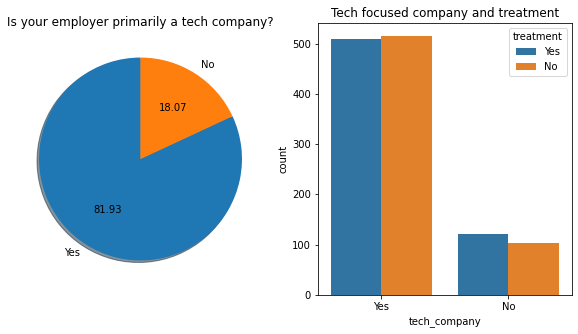

In [650]:
# tech company 
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['tech_company'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'No'], startangle = 90, shadow = True)
plt.title('Is your employer primarily a tech company?')

# tech company and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['tech_company'], hue = health_df['treatment'])
plt.title('Tech focused company and treatment')

The likelihood that employees at non-tech companies seek mental health treatment is slightly higher than for tech companies. 

#### Number of employees

Text(0.5, 1.0, 'Number of employees and treatment')

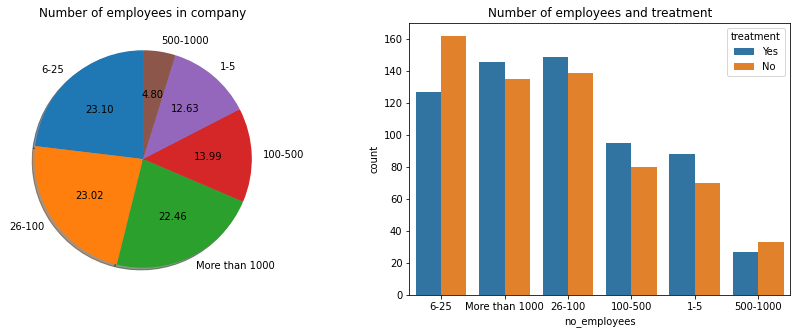

In [651]:
# number of employees
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['no_employees'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['6-25', '26-100', 'More than 1000', '100-500', '1-5', '500-1000'], startangle = 90, shadow = True)
plt.title('Number of employees in company')

# number of employees and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['no_employees'], hue = health_df['treatment'])
plt.title('Number of employees and treatment')

## Employer support

#### Mental health benefits

Text(0.5, 1.0, 'Employees and benefits')

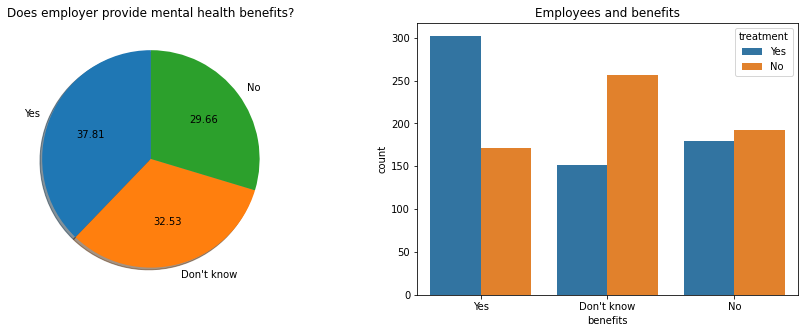

In [652]:
# does employer provide mental health benefits?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['benefits'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'Don\'t know', 'No'], startangle = 90, shadow = True)
plt.title('Does employer provide mental health benefits?')

# benefits and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['benefits'], hue = health_df['treatment'])
plt.title('Employees and benefits')

More employees are willing to seek treatment if their employers provide mental health benefits. 

#### Know about care options

Text(0.5, 1.0, 'Options and treatment')

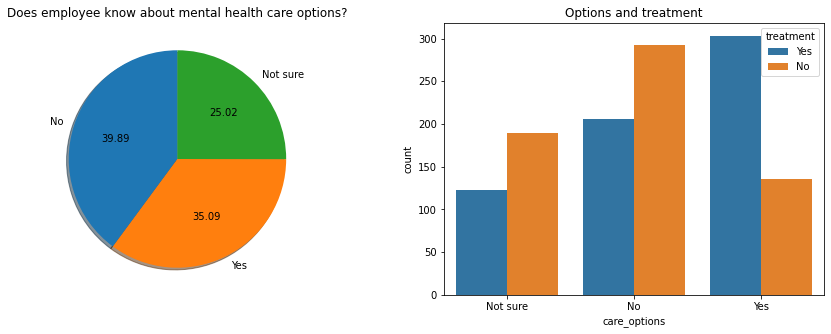

In [653]:
# Does employee know about mental health care options?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['care_options'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', 'Yes', 'Not sure'], startangle = 90, shadow = True)
plt.title('Does employee know about mental health care options?')

# Options and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['care_options'], hue = health_df['treatment'])
plt.title('Options and treatment')

Employees are more likely to get treatment if they know about their options.

#### Wellness program

Text(0.5, 1.0, 'Employer wellness program discussion and treatment')

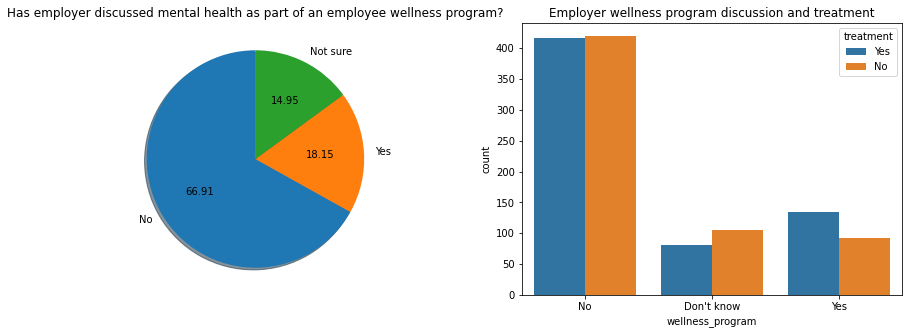

In [654]:
# Has employer ever discussed mental health as part of an employee wellness program?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['wellness_program'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', 'Yes', 'Not sure'], startangle = 90, shadow = True)
plt.title('Has employer discussed mental health as part of an employee wellness program?')

# Discussion and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['wellness_program'], hue = health_df['treatment'])
plt.title('Employer wellness program discussion and treatment')

Employees that had a wellness program were more likely to get treatment.

#### Employer resources

Text(0.5, 1.0, 'Provided resources and treatment')

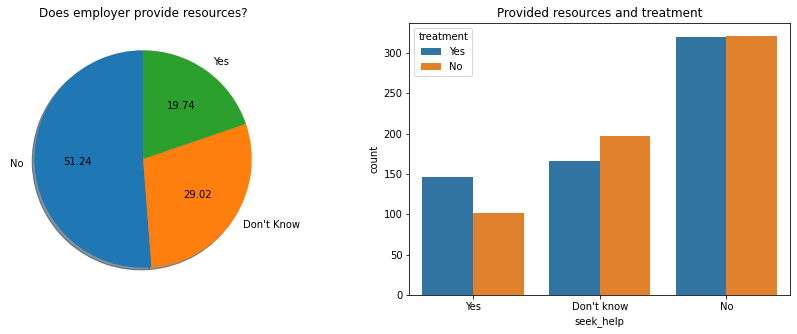

In [655]:
# Does your employer provide resources to learn more about mental health issues and how to seek help?
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
value = health_df['seek_help'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', "Don't Know", 'Yes'], startangle = 90, shadow = True)
plt.title('Does employer provide resources?')

# Resources and treatment
plt.subplot(1,2,2)
sns.countplot(x = health_df['seek_help'], hue = health_df['treatment'])
plt.title('Provided resources and treatment')

Employees likelier to get treatment if resources are provided. 

#### Anonymity

Text(0.5, 1.0, 'Is anonymity protected?')

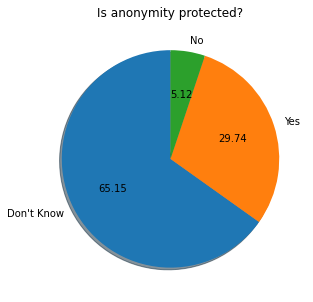

In [666]:
# Is anonymity protected?
plt.figure(figsize = (15,5))
value = health_df['anonymity'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Don't Know", 'Yes', "No"], startangle = 90, shadow = True)
plt.title('Is anonymity protected?')

Majority do not know about anonymity.

#### Taking leave 

Text(0.5, 1.0, 'How easy is it for you to take medical leave for a mental health condition?')

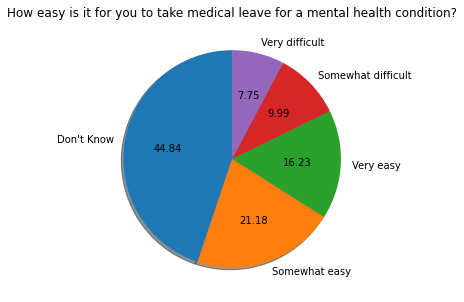

In [667]:
# easiness to take leave
plt.figure(figsize = (15,5))
value = health_df['leave'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Don't Know", 'Somewhat easy', "Very easy", "Somewhat difficult", "Very difficult"], startangle = 90, shadow = True)
plt.title('How easy is it for you to take medical leave for a mental health condition?')

Many do not know about their ability to take leave for mental health. 

#### Consequences for discussing

Text(0.5, 1.0, 'Consequences for discussing physical health issues')

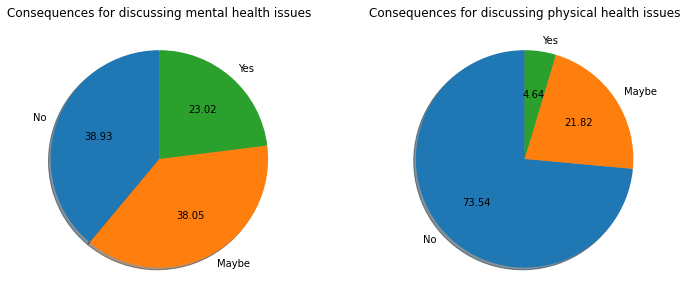

In [658]:
# discussing mental health issues
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
value = health_df['mental_health_consequence'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["No", "Maybe", "Yes"], startangle = 90, shadow = True)
plt.title('Consequences for discussing mental health issues')

# discussing physical health issues
plt.subplot(1,2,2)
value = health_df['phys_health_consequence'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["No", "Maybe", "Yes"], startangle = 90, shadow = True)
plt.title('Consequences for discussing physical health issues')

#### Willingness to discuss

Text(0.5, 1.0, 'Discussing mental health with supervisor')

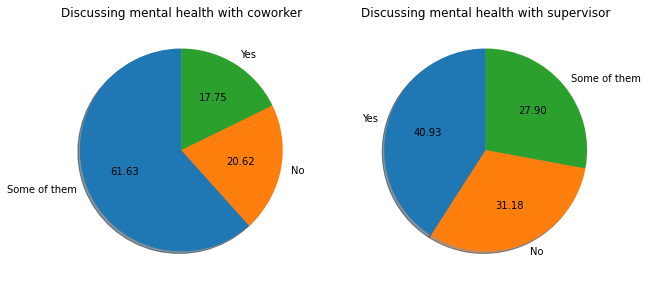

In [659]:
# discussing mental health with coworkers
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['coworkers'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Some of them", "No", "Yes"], startangle = 90, shadow = True)
plt.title('Discussing mental health with coworker')

# discussing mental health with supervisor
plt.subplot(1,2,2)
value = health_df['supervisor'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Yes", "No", "Some of them"], startangle = 90, shadow = True)
plt.title('Discussing mental health with supervisor')

#### Interview

Text(0.5, 1.0, 'Discussing physical health in an interview')

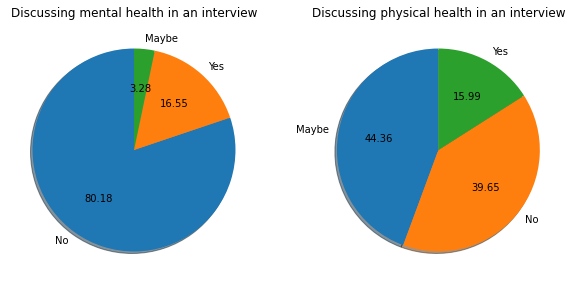

In [660]:
# discussing mental health in an interview
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
value = health_df['mental_health_interview'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["No", "Yes", "Maybe"], startangle = 90, shadow = True)
plt.title('Discussing mental health in an interview')

# discussing physical health in an interview
plt.subplot(1,2,2)
value = health_df['phys_health_interview'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Maybe", "No", "Yes"], startangle = 90, shadow = True)
plt.title('Discussing physical health in an interview')

#### Does employer take mental health seriously?

Text(0.5, 1.0, 'Does employer take mental health as serious as physical health?')

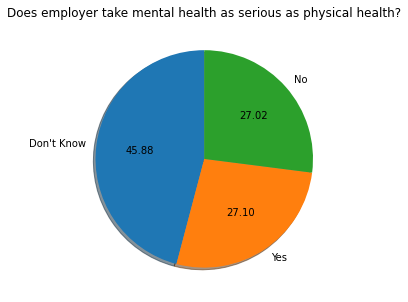

In [661]:
# Do you feel that your employer takes mental health as seriously as physical health?
plt.figure(figsize = (15,5))
value = health_df['mental_vs_physical'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ["Don't Know", 'Yes', "No"], startangle = 90, shadow = True)
plt.title('Does employer take mental health as serious as physical health?')

#### Observations of negative consequences?

Text(0.5, 1.0, 'Have you observed negative consequences for coworkers with mental health conditions in your workplace?')

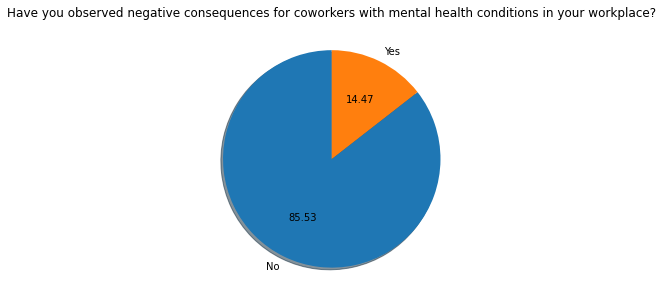

In [662]:
# heard or observed negative consequences for coworkers with mental health conditions
plt.figure(figsize = (10,5))
value = health_df['obs_consequence'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['No', "Yes"], startangle = 90, shadow = True)
plt.title('Have you observed negative consequences for coworkers with mental health conditions in your workplace?')